In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  40000 non-null  object
 1   label   40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


In [4]:
df.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [5]:
data=df.values
review=np.array(data[:,0])
label=np.array(data[:,1])

In [6]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [7]:
# Initializing Objects
tokenizer = RegexpTokenizer(r'\w+')
en_stopwords = set(stopwords.words('english'))
en_stopwords.remove('not')
ps = PorterStemmer()


In [8]:
#Tokenisation --> Stopword removal --> Stemming
def getStemmedReview(review) :
    review=review.lower()
    review=review.replace('<br /><br />',' ')
    
    tokens=tokenizer.tokenize(review)
    new_tokens=[token for token in tokens if token not in en_stopwords]
    cleaned_review=[ps.stem(token) for token in new_tokens]
    
    cleaned_review=' '.join(cleaned_review)
    return cleaned_review

In [9]:
#Cleanig the training data
m=review.shape[0]
for i in range(m) :
    review[i]=getStemmedReview(review[i])

In [10]:
df_test=pd.read_csv('Test.csv')

In [11]:
test_review=df_test['review'].values

In [12]:
#Cleaning the testing data
m=test_review.shape[0]
for i in range(m) :
    test_review[i]=getStemmedReview(test_review[i])

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_vec = cv.fit_transform(review)

In [14]:
print(review_vec) #Frequency sparse vector
print(review.shape)

  (0, 36382)	1
  (0, 29108)	1
  (0, 26775)	1
  (0, 10867)	1
  (0, 37086)	1
  (0, 60314)	1
  (0, 20903)	2
  (0, 11291)	1
  (0, 430)	1
  (0, 63325)	2
  (0, 55598)	2
  (0, 43686)	1
  (0, 10402)	1
  (0, 34594)	1
  (0, 59288)	1
  (0, 52684)	1
  (0, 41872)	1
  (0, 51132)	1
  (0, 35311)	1
  (0, 56815)	1
  (1, 27676)	1
  (1, 62250)	1
  (1, 24143)	1
  (1, 12462)	1
  (1, 62266)	1
  :	:
  (39999, 31993)	1
  (39999, 25733)	1
  (39999, 25701)	2
  (39999, 13817)	2
  (39999, 23685)	1
  (39999, 42661)	1
  (39999, 47890)	1
  (39999, 63872)	1
  (39999, 50348)	1
  (39999, 20114)	1
  (39999, 53850)	2
  (39999, 49721)	1
  (39999, 13503)	1
  (39999, 27523)	1
  (39999, 34437)	1
  (39999, 29834)	1
  (39999, 21936)	1
  (39999, 27291)	1
  (39999, 37774)	1
  (39999, 62984)	1
  (39999, 53855)	1
  (39999, 40271)	1
  (39999, 40340)	1
  (39999, 50894)	1
  (39999, 52531)	1
(40000,)


In [15]:
test_vec=cv.transform(test_review)

In [16]:
#Using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [17]:
#Training 
mnb=MultinomialNB()
mnb.fit(review_vec,label) 

MultinomialNB()

In [18]:
#Accuracy in prediction !!
print(mnb.score(review_vec,label))

0.8905


In [19]:
pred=mnb.predict(test_vec)

In [20]:
print(pred)

['neg' 'neg' 'neg' ... 'pos' 'pos' 'neg']


In [21]:
df_out=pd.DataFrame(data=pred,columns=['label'])

In [22]:
df_out.head()

,label
0,neg
1,neg
2,neg
3,neg
4,pos


In [23]:
#Writing the data to Output file
df_out.to_csv('Output.csv')

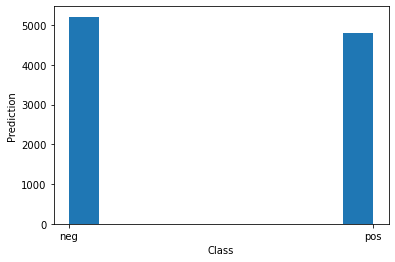

In [34]:
#Visualisation of Test data
plt.hist(pred)
plt.xlabel('Class')
plt.ylabel('Prediction')
plt.show()